In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [54]:
df = pd.read_csv("../artifacts/raw/data.csv")

In [55]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [57]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [58]:
df.duplicated().sum()

np.int64(0)

In [59]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [60]:
df["Species"].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [61]:
Data is perfectly balanced

SyntaxError: invalid syntax (2929957100.py, line 1)

In [9]:
df.drop(columns=["Id"], inplace=True)

In [10]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


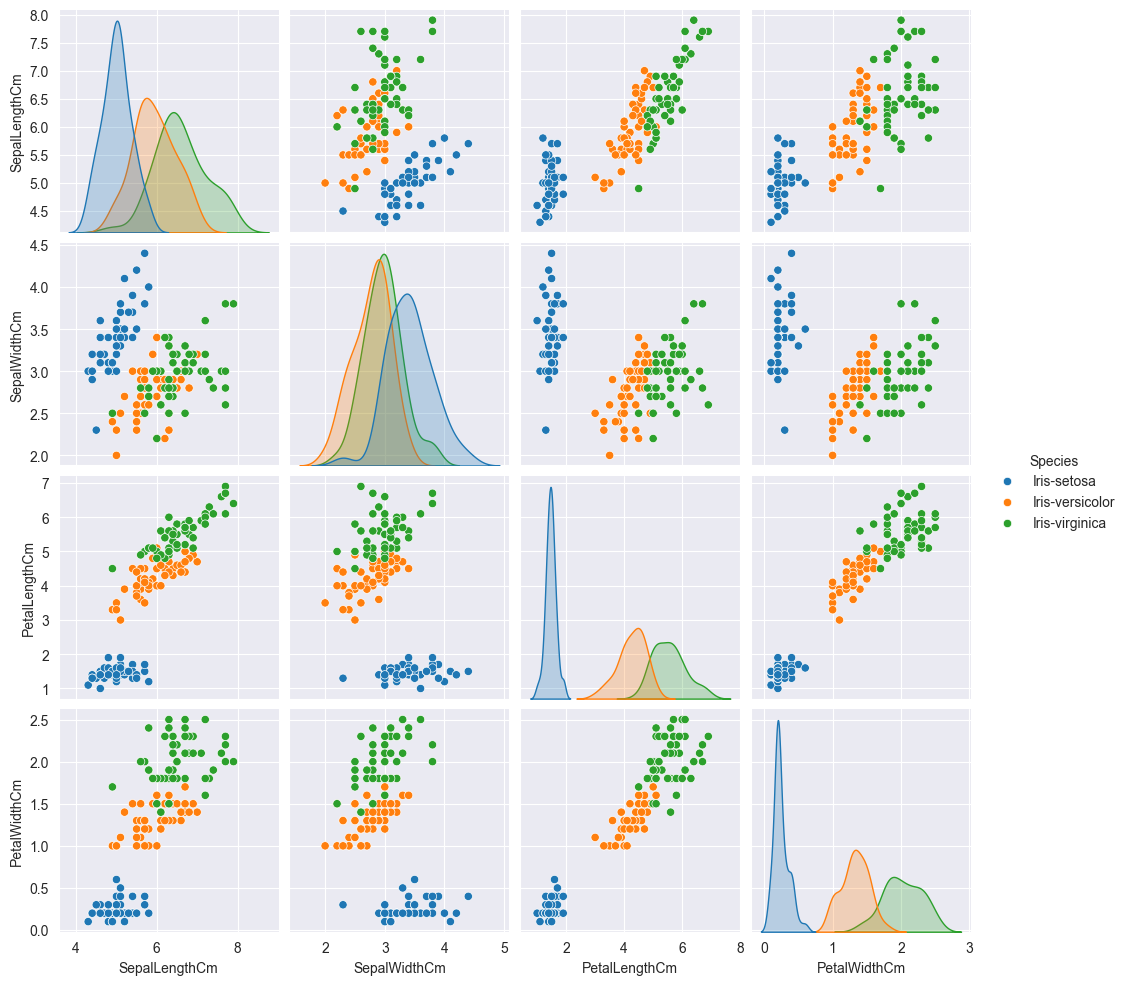

In [11]:
sns.pairplot(df, hue="Species")
plt.show()

<Axes: >

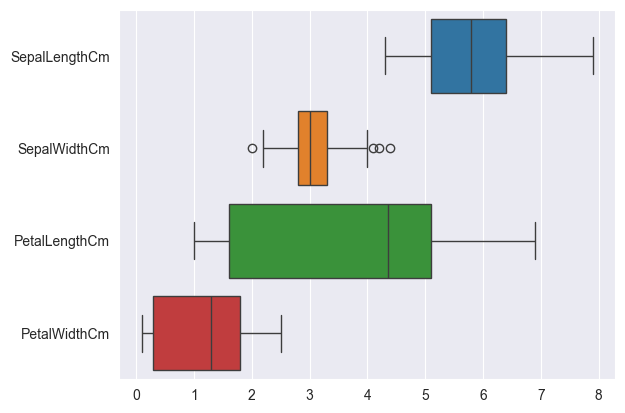

In [12]:
sns.boxplot(data=df, orient="h")

Sepal width has outlier data

Text(0.5, 1.0, 'Before Outlier Imputation')

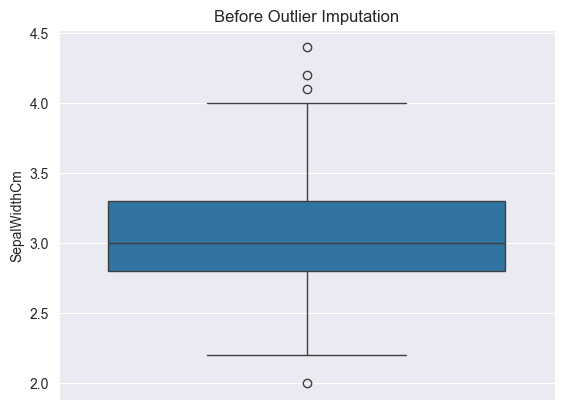

In [13]:
sns.boxplot(df["SepalWidthCm"])
plt.title("Before Outlier Imputation")

In [16]:
Q1 = df["SepalWidthCm"].quantile(0.25)
Q3 = df["SepalWidthCm"].quantile(0.75)

IQR = Q3-Q1

Lower_value = Q1 - 1.5*IQR
Upper_value = Q3 + 1.5*IQR

sepal_median = np.median(df["SepalWidthCm"])

In [17]:
Lower_value

np.float64(2.05)

In [18]:
Upper_value

np.float64(4.05)

In [19]:
sepal_median

np.float64(3.0)

all the values above and below upper and lower limit will be imputed with th median

In [21]:
for i in df["SepalWidthCm"]:
    if i> Upper_value or i<Lower_value:
        df["SepalWidthCm"] = df["SepalWidthCm"].replace(i,sepal_median)



Text(0.5, 1.0, 'After Outlier Imputation')

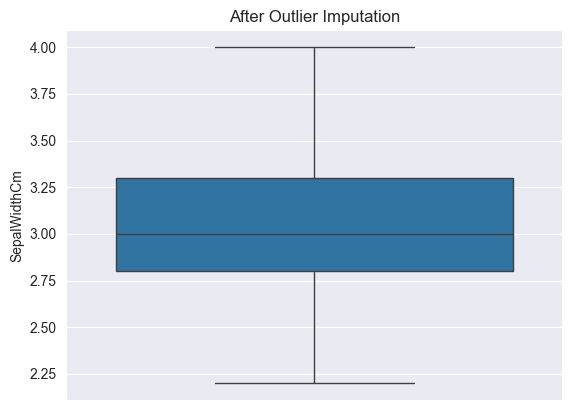

In [22]:
sns.boxplot(df["SepalWidthCm"])
plt.title("After Outlier Imputation")

<Axes: >

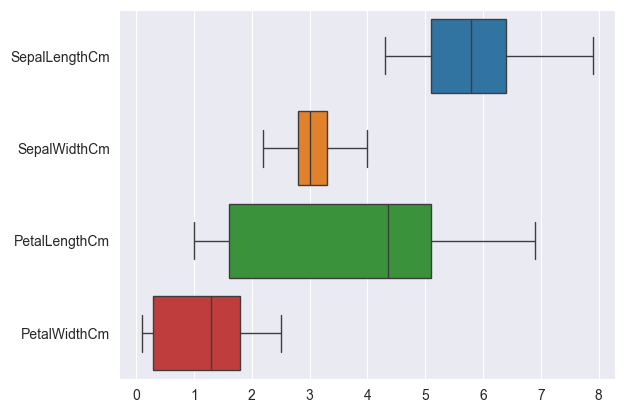

In [23]:
sns.boxplot(data=df, orient="h")

In [ ]:
Model Training Using Decision Trees




In [24]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix

In [25]:
df.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [26]:
X = df[['SepalWidthCm', 'SepalLengthCm', 'PetalLengthCm', 'PetalWidthCm' ]]
Y = df['Species']

In [27]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [28]:
tree_clf = DecisionTreeClassifier(criterion="gini", max_depth=30, random_state=42)

In [29]:
tree_clf.fit(X_train, Y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,30
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [30]:
y_pred = tree_clf.predict(X_test)

In [31]:
y_pred

array(['Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa'], dtype=object)

In [32]:
accuracy = accuracy_score(Y_test, y_pred)

In [33]:
accuracy

1.0

In [35]:
 conf_matrix = confusion_matrix(Y_test, y_pred)

In [36]:
conf_matrix


array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]])

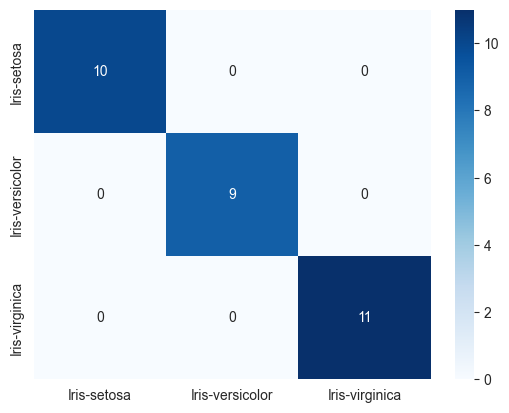

In [39]:
sns.heatmap(conf_matrix,annot=True , cmap="Blues" , xticklabels=tree_clf.classes_ , yticklabels=tree_clf.classes_)
plt.show()

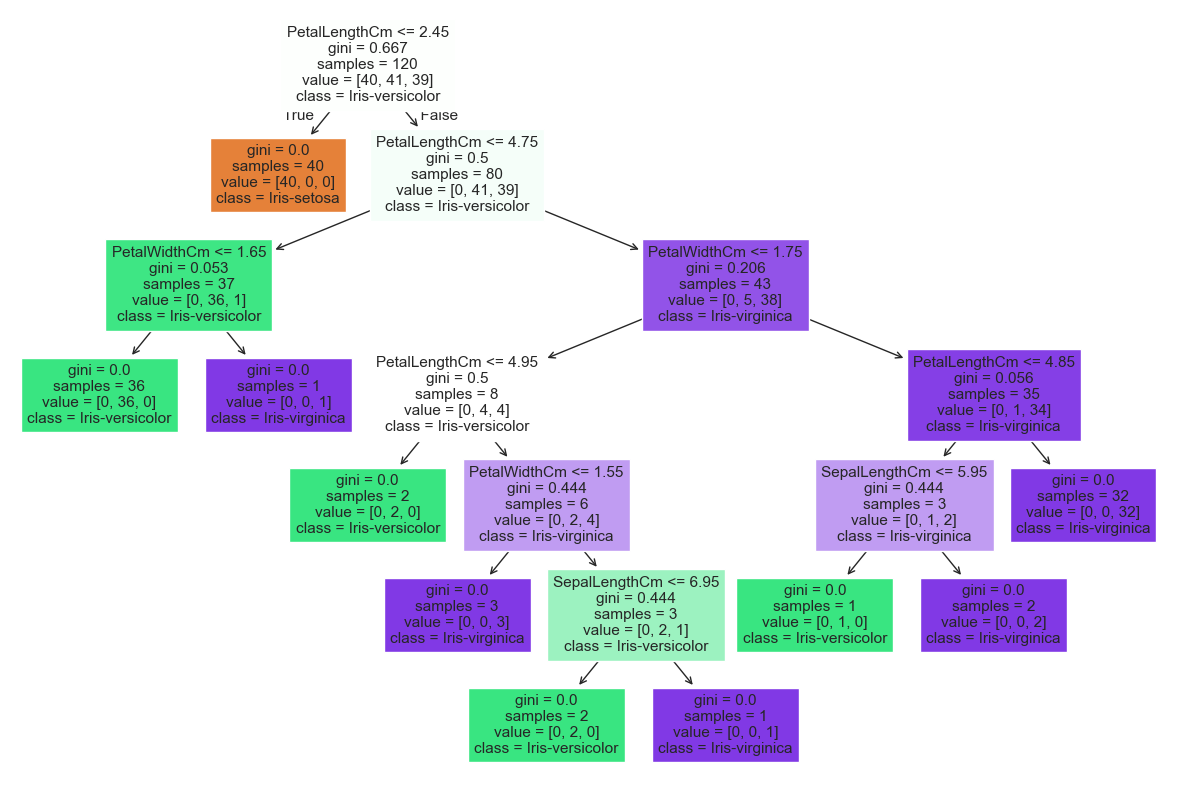

In [40]:
           ##Plot Tree

plt.figure(figsize=(15,10))
plot_tree(tree_clf, filled=True, feature_names=X.columns , class_names=tree_clf.classes_)
plt.show()

In [41]:
tree_clf.feature_importances_

array([0.        , 0.03334028, 0.88947325, 0.07718647])

In [42]:
X.columns

Index(['SepalWidthCm', 'SepalLengthCm', 'PetalLengthCm', 'PetalWidthCm'], dtype='object')

In [ ]:
#most useful- petal length. most useless: sepal width